## Task 1: Loan Data Automation

In [129]:
!pip install tabula-py
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing python libraries to read and convert data into python dataset

In [147]:
import pandas as pd
import tabula
import matplotlib.pyplot as plt

In [148]:
#Importing pdf file into pandas dataset 
pdf_file_path = r"C:\Users\Asus\Desktop\PDA - Loans_Database_Table.pdf"
loan_df_pdf = tabula.read_pdf(pdf_file_path, pages='all')

In [149]:
#Converting pdf file into csv file to get structured result
csv_table = tabula.io.convert_into(pdf_file_path,r"C:\Users\Asus\Desktop\DataTable.csv",pages="all")
loan_df_csv = pd.read_csv(r"C:\Users\Asus\Desktop\DataTable.csv")
loan_df_csv

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2265,1,1,2,0,0,1993,1625.0,113,180,1,2,Y
394,2266,1,1,2,1,0,3100,1400.0,113,360,1,1,Y
395,2272,1,1,2,1,0,3276,484.0,135,360,0,2,Y
396,2277,2,0,0,1,0,3180,0.0,71,360,0,1,N


In [150]:
#importing excel file in a pandas dataset
excel_file_path =  r"C:\Users\Asus\Desktop\PDA - Zappy Loan Data_Summtive.xlsx"
loan_df_excel = pd.read_excel(excel_file_path)
loan_df_excel

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


Step 2 : Combining two Datasets in a pandas Dataframe

In [151]:
#Combining two Series in a dataframe
loan_df = pd.concat([loan_df_csv] + [loan_df_excel])
loan_df

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


In [152]:
loan_df['Gender'] = loan_df['Gender'].map({1: 'Male', 2: 'Female'})
loan_df['Married'] = loan_df['Married'].map({0: 'Single', 1: 'Married'})
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', '3')
loan_df['Graduate'] = loan_df['Graduate'].map({0: 'No', 1: 'Yes'})
loan_df['Self_Employed'] = loan_df['Self_Employed'].map({0: 'No', 1: 'Yes'})
loan_df['Credit_History'] = loan_df['Credit_History'].map({0: 'No', 1: 'Yes'})
loan_df['Property_Area'] = loan_df['Property_Area'].map({1: 'Urban', 2: 'Semiurban', 3: 'Rural'})

## Task 2: Data Cleaning

Step 1 : Checking for duplicates, null and missing values in a record

In [153]:
#Checking for duplicate values
duplicates = loan_df.duplicated()
duplicates.sum()

3

In [154]:
#Checking for missing values
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Step 2 : Rempving Duplicates and Null values

In [155]:
#Removing Duplicate values from the record
loan_df = loan_df.drop_duplicates()
#Checking for duplicates
loan_df.duplicated().sum()

0

In [156]:
#Removing Null or Missing values
loan_updated_df = loan_df.dropna()

In [157]:
#Dataset after perfoming Data Cleaning
loan_updated_df

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,Single,0,Yes,No,5849,0.0,128,360,Yes,Urban,Y
1,1003,Male,Married,1,Yes,No,4583,1508.0,128,360,Yes,Rural,N
2,1005,Male,Married,0,Yes,Yes,3000,0.0,66,360,Yes,Urban,Y
3,1006,Male,Married,0,No,No,2583,2358.0,120,360,Yes,Urban,Y
4,1008,Male,Single,0,Yes,No,6000,0.0,141,360,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,Rural,Y
243,2979,Male,Married,3,Yes,No,4106,0.0,40,180,Yes,Rural,Y
244,2983,Male,Married,1,Yes,No,8072,240.0,253,333,Yes,Urban,Y
245,2984,Male,Married,2,Yes,No,7583,0.0,187,333,Yes,Urban,Y


## Task 3: Descriptive Analysis

1 : Demonstrate the percentage of female applicants that had their loan approved

In [158]:
#Filtering out the number of female applicants who had their loan approved
female_applicants = loan_df[(loan_df['Gender'] == 'Female') & (loan_df['Loan_Status'] == 'Y')]

#Calculating the percentage 
percentage_approved_female = len(female_applicants)/len(loan_updated_df[loan_updated_df['Gender'] == 'Female'])*100

# Displaying the results
print("Percentage of female applicants with approved loans: {:.2f}%".format(percentage_approved_female))

Percentage of female applicants with approved loans: 68.38%


2. Demonstrate the average income of all applicants

In [159]:
#Calculating the average income
average_income_all_applicants = loan_df['ApplicantIncome'].mean()

#Displaying the results
print("Average income of all applicants: {:.2f}".format(average_income_all_applicants))

Average income of all applicants: 5370.39


3. Demonstrate the average income of all Self-employed applicants

In [160]:
#Filtering out the number of Self-Employed applicants
self_employed_applicants = loan_df[loan_df['Self_Employed'] == 'Yes']

#Calculating the average income
average_income_self_employed = self_employed_applicants['ApplicantIncome'].mean()

#Displaying the results
print("Average income of self-employed applicants: {:.2f}".format(average_income_self_employed))

Average income of self-employed applicants: 7340.72


4. Demonstrate the average income of all not Self-employed applicants

In [161]:
#Filtering out the number of not Self-employed applicants
not_self_employed_applicants = loan_df[loan_df['Self_Employed'] == 'No']

#Calculating the average income
average_income_not_self_employed = not_self_employed_applicants['ApplicantIncome'].mean()

#Displaying the results
print("Average income of non self-employed applicants: {:.2f}".format(average_income_not_self_employed))

Average income of non self-employed applicants: 5077.83


5. Demonstrate the average income of all graduate applicants

In [162]:
#Filtering out the number of graduate applicants
graduate_applicants = loan_df[loan_df['Graduate'] == 'Yes']

#Calculating the average income
average_income_graduate = graduate_applicants['ApplicantIncome'].mean()

#Displaying the results
print("Average income of graduate applicants: {:.2f}".format(average_income_graduate))

Average income of graduate applicants: 5818.70


6. Demonstrate the percentage of graduate applicants that had their loan status approved

In [163]:
#Filtering out the number of graduate applicants
graduate_applicants = loan_updated_df[(loan_updated_df['Graduate'] == 'Yes') & (loan_updated_df['Loan_Status'] == 'Y')]

#Calculating the percentage
num_total_graduate_applicants = len(loan_df[loan_df['Graduate'] == 'Yes'])
percentage_approved_graduate = len(graduate_applicants) / num_total_graduate_applicants * 100

#Displaying the results
print("Percentage of graduate applicants with approved loans: {:.2f}%".format(percentage_approved_graduate))

Percentage of graduate applicants with approved loans: 71.57%


## Task 4: Data Visualisation

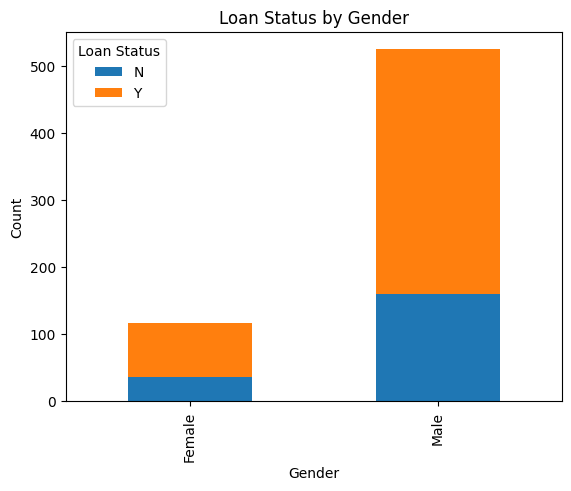

In [164]:
#Loans approved based on gender

loan_status_by_gender = loan_df.groupby('Gender')['Loan_Status'].value_counts().unstack()
loan_status_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Status by Gender')
plt.legend(title='Loan Status')
plt.show()

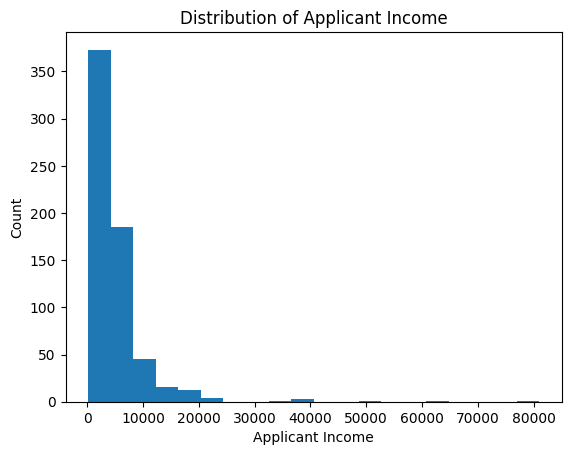

In [171]:
#plotting histogram
plt.hist(loan_df['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Distribution of Applicant Income')
plt.show()

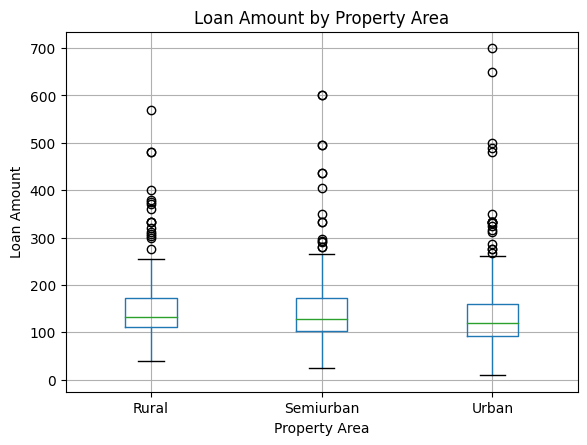

In [173]:
#Plotting the graph of Loan Amount by Property Area
loan_df.boxplot(column='LoanAmount', by='Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Property Area')
plt.suptitle('')  # Remove the default title
plt.show()

<Axes: title={'center': 'Loans Approved by Marital Status'}, ylabel='Loan_ID'>

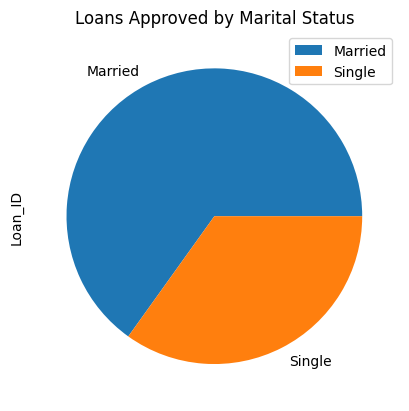

In [165]:
#Loans approved by Marital Status

#Grouping thr Loan_ID data on the basis of marital status
grp_data = loan_updated_df.groupby(["Married"]).count()
#grp_data = grp_data["Loan_ID"]

#Plotting a pie graph
grp_data.plot.pie(y='Loan_ID', title = "Loans Approved by Marital Status")

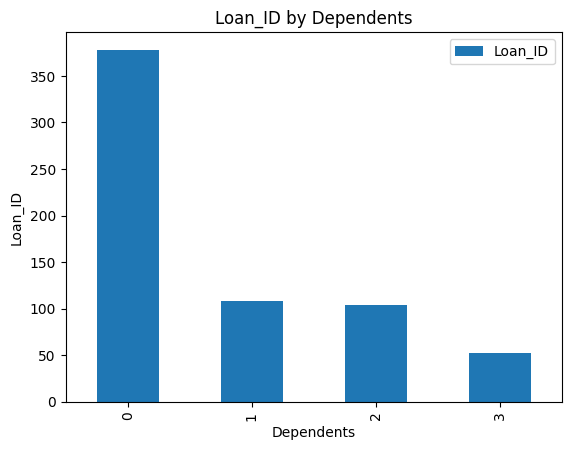

In [167]:
#Loans Approved on the basis of Dependents

# Grouping the Loan_ID on the basis of dependents
grp_data = loan_updated_df.groupby(["Dependents"]).count()

# Plotting a bar graph for grouped data using plot function
plt_grp_data = grp_data["Loan_ID"].plot(kind='bar',ylabel = "Loan_ID", title = "Loan_ID by Dependents", width = 0.5,legend= True)

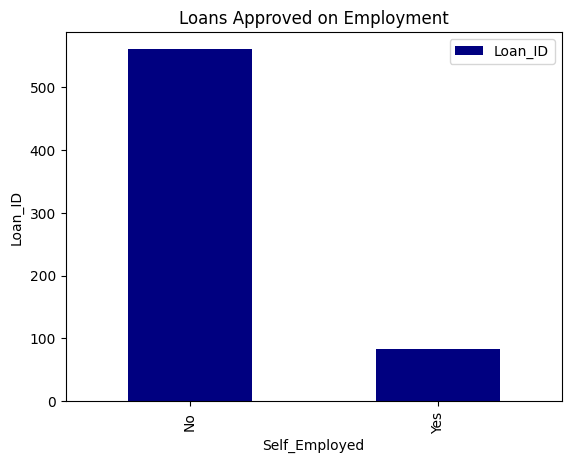

In [168]:
#Loans Approved on Employment

# Grouping the Loan_ID on the basis of Self_Employed
grp_data = loan_updated_df.groupby(["Self_Employed"]).count()

# Plotting a bar graph for grouped data using plot function
plt_grp_data = grp_data["Loan_ID"].plot(kind='bar',ylabel = "Loan_ID", title = "Loans Approved on Employment",color='Navy', width = 0.5,legend= True)
